# Parkinson's Disease Prediction Using Machine Learning (Regression)
Project Created by - Afsana Alam Akhie 

Parkinson’s disease affects over one million people in North America alone. Moreover, an aging population means this number is expected to rise as studies suggest rapidly increasing prevalence rates after the age of 60 (Little et al., 2009). Research has shown that approximately 90% of people with Parkinson's exhibit some form of vocal impairment. Vocal impairment may also be one of the earliest indicators for the onset of the illness, and the measurement of voice is non-invasive and simple to administer.

The project involves a Regression analysis, which is a collection of statistical techniques for predicting the associations between the target variable (Total UPDRS score) and one or more features (Voice signals). The goal of the regression task is to predict the Total UPDRS score. The Motor_UPDRS score was suggested not to be included. To avoid bias, the subject ID was also removed from the data.

Pycaret uses the following evaluation metrics: For Classification: Accuracy, AUC, Recall, Precision, F1, Kappa, and For Regression: MAE, MSE, RMSE, R2, RMSLE, MAPE. RMSE values are the most often used measure to demonstrate model fitness, hence it is used in this project.

In [1]:
import numpy as np 
import pandas as pd
import pycaret
from pycaret.regression import *
from pycaret.regression import RegressionExperiment
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn'])

Load sample dataset. It can be directly fetched from website as well. 
Data: https://archive.ics.uci.edu/dataset/189/parkinsons+telemonitoring

In [2]:
def load_dataset():
    data = pd.read_csv('C:/Users/afsan/Documents/ML_course_project/parkinsons+telemonitoring/parkinsons_updrs.data')
    return data

data = load_dataset()

In [3]:
data.head(5)

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


# Descriptions of attributes

Features:
- age = Subject's age
- sex = Subject's gender, '0' = male, '1' = female
- test_time = Time since recruitment into the trial. The integer part is the number of days since recruitment. 
- Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP = Several measures of variations in fundamental frequency
- Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA = Several measures of variations in amplitude
- NHR, HNR = Two measures of ratio of noise to tonal components in the voice
- RPDE = A nonlinear dynamical complexity measure
- DFA = Signal fractal scaling exponent
- PPE = A nonlinear measure of fundamental frequency variation 

Target:
- total_UPDRS = Clinician's total UPDRS score, linearly interpolated

In [4]:
df = data.drop(columns=['subject#','motor_UPDRS'])

In [5]:
df.head(5)

,age,sex,test_time,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72,0,5.6431,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,12.6660,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,72,0,19.6810,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,72,0,25.6470,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,72,0,33.6420,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [6]:
df.shape

(5875, 20)

# 1. Exploratory data analysis
The study began with an exploratory analysis of the data using the correlation matrix between the variables. 

In [7]:
df.describe().round(4)

,age,sex,test_time,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.0000,5875.0000,5875.0000,5875.0000,5875.0000,5875.0000,5875.0000,5875.0000,5875.0000,5875.0000,5875.0000,5875.0000,5875.0000,5875.0000,5875.0000,5875.0000,5875.0000,5875.0000,5875.0000,5875.0000
mean,64.8049,0.3178,92.8637,29.0189,0.0062,0.0000,0.0030,0.0033,0.0090,0.0340,0.3110,0.0172,0.0201,0.0275,0.0515,0.0321,21.6795,0.5415,0.6532,0.2196
std,8.8215,0.4657,53.4456,10.7003,0.0056,0.0000,0.0031,0.0037,0.0094,0.0258,0.2303,0.0132,0.0167,0.0200,0.0397,0.0597,4.2911,0.1010,0.0709,0.0915
min,36.0000,0.0000,-4.2625,7.0000,0.0008,0.0000,0.0003,0.0004,0.0010,0.0031,0.0260,0.0016,0.0019,0.0025,0.0048,0.0003,1.6590,0.1510,0.5140,0.0220
25%,58.0000,0.0000,46.8475,21.3710,0.0036,0.0000,0.0016,0.0018,0.0047,0.0191,0.1750,0.0093,0.0108,0.0157,0.0278,0.0110,19.4060,0.4698,0.5962,0.1563
50%,65.0000,0.0000,91.5230,27.5760,0.0049,0.0000,0.0022,0.0025,0.0068,0.0275,0.2530,0.0137,0.0159,0.0227,0.0411,0.0184,21.9200,0.5422,0.6436,0.2055
75%,72.0000,1.0000,138.4450,36.3990,0.0068,0.0001,0.0033,0.0035,0.0099,0.0397,0.3650,0.0206,0.0238,0.0327,0.0617,0.0315,24.4440,0.6140,0.7113,0.2645
max,85.0000,1.0000,215.4900,54.9920,0.1000,0.0004,0.0575,0.0696,0.1726,0.2686,2.1070,0.1627,0.1670,0.2755,0.4880,0.7483,37.8750,0.9661,0.8656,0.7317


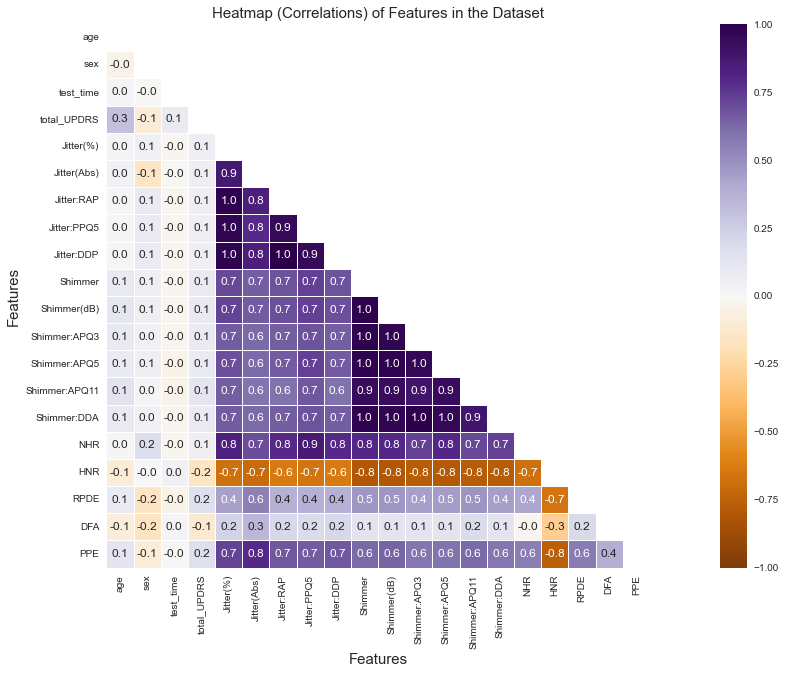

In [8]:
# Create a correlation matrix. Only bottom left corner valued.
df_corr = df.corr().round(4)

mask = np.zeros_like(df_corr.round(4))
mask[np.triu_indices_from(mask)] = True

# Generate the corrleation matrix (heatmap) using Seaborn.
with sns.axes_style("whitegrid"):
    f, ax = plt.subplots(figsize=(25, 10))
    ax = sns.heatmap(df_corr.round(2), mask=mask, vmax=1, center = 0, vmin=-1, square=True, cmap='PuOr', linewidths=.5, annot=True, annot_kws={"size": 12}, fmt='.1f')
    plt.title('Heatmap (Correlations) of Features in the Dataset', fontsize=15)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Features', fontsize=15)
plt.show()

# 2. Compare best models - Without Feature Selection
By just using the Pycaret library, a base model is produced without adding any feature selection. 
(The project used the PyCaret library to implement the machine learning regression on the dataset. Pycaret is a low-code Python machine-learning toolbox that automates processes and accelerates experiment cycles.)

# 2. a. Setup

In [9]:
#s = setup(data = df, target = 'total_UPDRS', session_id = 123)
s = setup(data = df, target = 'total_UPDRS', session_id = 123, log_experiment = True,  
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,total_UPDRS
2,Target type,Regression
3,Original data shape,"(5875, 20)"
4,Transformed data shape,"(5875, 20)"
5,Transformed train set shape,"(4112, 20)"
6,Transformed test set shape,"(1763, 20)"
7,Numeric features,19
8,Preprocess,True
9,Imputation type,simple


# 2. b. Compare models

In [10]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.0462,3.3764,1.8292,0.9701,0.0994,0.0529,0.3620
rf,Random Forest Regressor,0.9980,3.9968,1.9849,0.9646,0.0976,0.0488,0.8620
xgboost,Extreme Gradient Boosting,1.4024,4.8136,2.1891,0.9572,0.1051,0.0635,0.2310
lightgbm,Light Gradient Boosting Machine,1.4390,4.9487,2.2115,0.9561,0.1042,0.0653,0.1450
catboost,CatBoost Regressor,1.5683,5.0364,2.2412,0.9554,0.1099,0.0726,2.6290
dt,Decision Tree Regressor,1.0350,11.7535,3.3994,0.8960,0.1449,0.0452,0.0340
gbr,Gradient Boosting Regressor,3.9179,25.2530,5.0205,0.7764,0.2000,0.1672,0.5570
knn,K Neighbors Regressor,3.7888,38.9665,6.2364,0.6529,0.2447,0.1731,0.0320
ada,AdaBoost Regressor,7.2945,70.1474,8.3720,0.3781,0.3241,0.3198,0.2320
ridge,Ridge Regression,8.0417,94.4317,9.7127,0.1639,0.3638,0.3518,0.0130


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [11]:
# check the final parameters of the best model
#best.get_params()

# 2. c. Analyze best model

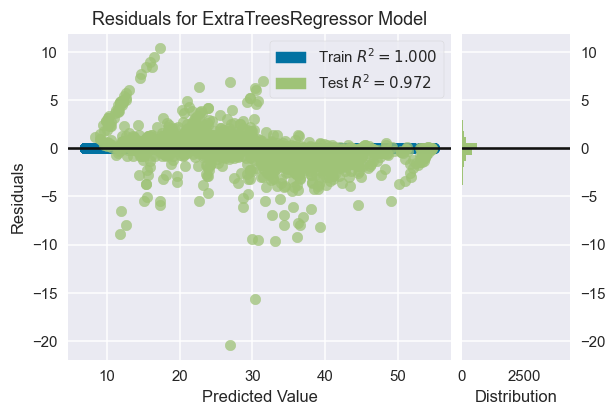

In [12]:
# plot residuals of the best model
plot_model(best, plot = 'residuals', scale = 1.5)

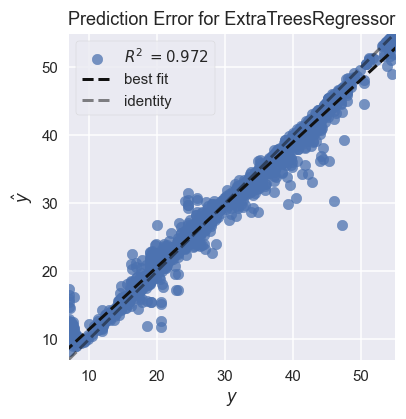

In [13]:
# plot error of the best model
plot_model(best, plot = 'error', scale = 1.5)

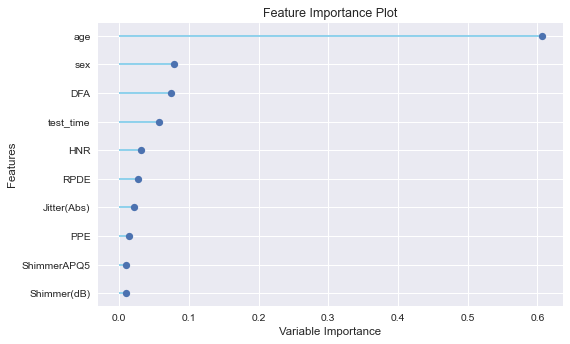

In [14]:
# plot feature importance of the best model
plot_model(best, plot = 'feature', scale = 0.75)

In [15]:
# evaluate trained model
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# 2. d. Prediction from best model

In [16]:
# predict on hold-out/test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1.0116,3.2464,1.8018,0.9723,0.0909,0.0479


In [17]:
# show predictions of df
holdout_pred.head(5)

,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),...,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,total_UPDRS,prediction_label
2661,55,0,117.779999,0.00506,0.000034,0.00164,0.00223,0.00493,0.01881,0.188,...,0.01064,0.01410,0.02659,0.011061,25.356001,0.44055,0.67158,0.18952,26.663000,23.81030
1172,73,1,183.699997,0.00259,0.000011,0.00111,0.00104,0.00333,0.01376,0.129,...,0.00718,0.01277,0.01664,0.007869,26.225000,0.40624,0.60236,0.12222,29.031000,28.84409
1877,58,1,175.389999,0.00358,0.000020,0.00161,0.00168,0.00482,0.02201,0.201,...,0.01337,0.01787,0.03365,0.010896,22.733999,0.42592,0.57892,0.14130,25.417999,23.70225
547,74,0,142.699997,0.00484,0.000039,0.00207,0.00218,0.00622,0.03640,0.373,...,0.01909,0.02824,0.05911,0.017947,21.205000,0.62605,0.60507,0.14467,27.139000,27.03411
5068,56,1,105.790001,0.00545,0.000027,0.00320,0.00296,0.00961,0.02196,0.192,...,0.01341,0.01518,0.03755,0.015528,21.239000,0.36154,0.61082,0.11911,43.201000,42.72719


In [18]:
# predict on new data (copy data and drop total_UPDRS)
new_data = df.copy()
new_data.drop('total_UPDRS', axis=1, inplace=True)
new_data.head()

,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72,0,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,72,0,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,72,0,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,72,0,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [19]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,prediction_label
0,72,0,5.643100,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.639999,0.41888,0.54842,0.16006,34.397999
1,72,0,12.666000,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183001,0.43493,0.56477,0.10810,34.894001
2,72,0,19.681000,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047001,0.46222,0.54405,0.21014,35.389000
3,72,0,25.646999,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445000,0.48730,0.57794,0.33277,35.810001
4,72,0,33.641998,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.125999,0.47188,0.56122,0.19361,36.375000


# 2. e. Save best model

In [20]:
# save pipeline
save_model(best, 'Best_model_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'sex', 'test_time',
                                              'Jitter(%)', 'Jitter(Abs)',
                                              'Jitter:RAP', 'Jitter:PPQ5',
                                              'Jitter:DDP', 'Shimmer',
                                              'Shimmer(dB)', 'Shimmer:APQ3',
                                              'Shimmer:APQ5', 'Shimmer:APQ11',
                                              'Shimmer:DDA', 'NHR', 'HNR',
                                              'RPDE', 'DFA', 'PPE'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=MinMaxScaler()))

In [21]:
# load pipeline
loaded_best_pipeline = load_model('Best_model_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\afsan\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'sex', 'test_time',
                                             'Jitter(%)', 'Jitter(Abs)',
                                             'Jitter:RAP', 'Jitter:PPQ5',
                                             'Jitter:DDP', 'Shimmer',
                                             'Shimmer(dB)', 'Shimmer:APQ3',
                                             'Shimmer:APQ5', 'Shimmer:APQ11',
                                             'Shimmer:DDA', 'NHR', 'HNR',
                                             'RPDE', 'DFA', 'PPE'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model',
                 ExtraTreesRegressor(n_jobs=-1, random_state=123))])

# 3. Compare best models - With Feature Selection
Later, another model was evaluated by adding feature selection modules depending on their significance, and the best three models were identified based on the RMSE. 
The project employed feature selection in Pycaret where in the setup remove_multicollinearity, bin_numeric_features and feature_selection_estimator parameters were defined. Based on the plot of feature importance plot from the analyses, the final considered features are – age, sex, DFA, test_time, HNR, RPDE, Jitter(Abs), ShimmerAPQ11, PPE, and NHR. 

# 3. a. Setup

In [22]:
s = setup(data = df, target = 'total_UPDRS', session_id = 123, polynomial_features = False, 
          bin_numeric_features = ['DFA', 'test_time'], remove_multicollinearity = True,   
          feature_selection = True, feature_selection_estimator='et', n_features_to_select = 11, 
          log_experiment = True,  
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,total_UPDRS
2,Target type,Regression
3,Original data shape,"(5875, 20)"
4,Transformed data shape,"(5875, 12)"
5,Transformed train set shape,"(4112, 12)"
6,Transformed test set shape,"(1763, 12)"
7,Numeric features,19
8,Preprocess,True
9,Imputation type,simple


# 3. b. Compare models

In [23]:
best_fe = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.1324,3.6291,1.8998,0.9678,0.1001,0.0554,0.6350
rf,Random Forest Regressor,1.0655,3.6863,1.9131,0.9673,0.0971,0.0515,0.8190
xgboost,Extreme Gradient Boosting,1.4668,4.9602,2.2235,0.9558,0.1097,0.0674,0.5160
catboost,CatBoost Regressor,1.5523,5.0051,2.2340,0.9556,0.1110,0.0722,1.7590
lightgbm,Light Gradient Boosting Machine,1.5046,5.1655,2.2671,0.9541,0.1093,0.0694,0.5050
dt,Decision Tree Regressor,1.2522,10.0754,3.1145,0.9102,0.1489,0.0583,0.4000
gbr,Gradient Boosting Regressor,3.8533,24.4291,4.9392,0.7838,0.1988,0.1655,0.6950
knn,K Neighbors Regressor,4.5986,48.9650,6.9840,0.5649,0.2756,0.2088,0.4250
ada,AdaBoost Regressor,7.2430,69.5116,8.3349,0.3836,0.3214,0.3165,0.5300
lar,Least Angle Regression,8.1045,95.6384,9.7747,0.1532,0.3665,0.3551,0.4310


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [24]:
# check the final parameters of best model
best_fe.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

# 3. c. Analyze best model

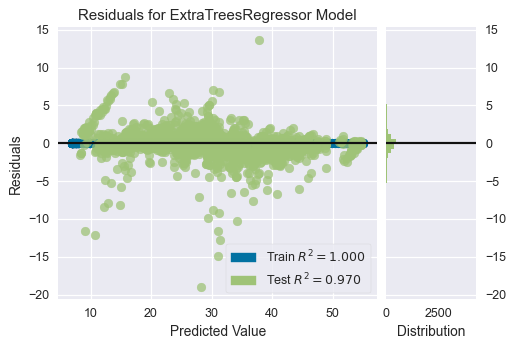

In [25]:
# plot residuals
plot_model(best_fe, plot = 'residuals', scale = 1.25)

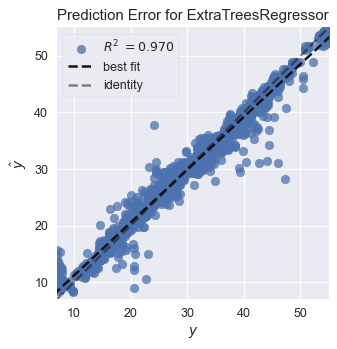

In [26]:
# plot error
plot_model(best_fe, plot = 'error', scale = 1.25)

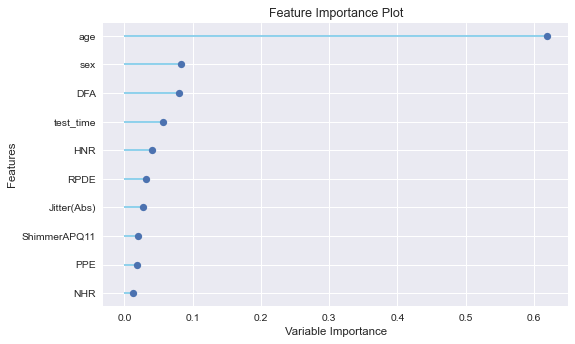

In [27]:
# plot feature importance of the best model
plot_model(best_fe, plot = 'feature', scale = 0.75)

In [28]:
evaluate_model(best_fe)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# 3. d. Prediction from best model

In [29]:
# predict on test set
holdout_pred = predict_model(best_fe)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1.1133,3.4853,1.8669,0.9703,0.0901,0.0504


In [30]:
# show predictions df
holdout_pred.head()

,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),...,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,total_UPDRS,prediction_label
2661,55,0,117.779999,0.00506,0.000034,0.00164,0.00223,0.00493,0.01881,0.188,...,0.01064,0.01410,0.02659,0.011061,25.356001,0.44055,0.67158,0.18952,26.663000,24.996260
1172,73,1,183.699997,0.00259,0.000011,0.00111,0.00104,0.00333,0.01376,0.129,...,0.00718,0.01277,0.01664,0.007869,26.225000,0.40624,0.60236,0.12222,29.031000,29.340880
1877,58,1,175.389999,0.00358,0.000020,0.00161,0.00168,0.00482,0.02201,0.201,...,0.01337,0.01787,0.03365,0.010896,22.733999,0.42592,0.57892,0.14130,25.417999,24.382490
547,74,0,142.699997,0.00484,0.000039,0.00207,0.00218,0.00622,0.03640,0.373,...,0.01909,0.02824,0.05911,0.017947,21.205000,0.62605,0.60507,0.14467,27.139000,27.014960
5068,56,1,105.790001,0.00545,0.000027,0.00320,0.00296,0.00961,0.02196,0.192,...,0.01341,0.01518,0.03755,0.015528,21.239000,0.36154,0.61082,0.11911,43.201000,43.716281


In [31]:
# copy data and drop total_UPDRS

new_data = df.copy()
new_data.drop('total_UPDRS', axis=1, inplace=True)
new_data.head()

,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72,0,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,72,0,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,72,0,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,72,0,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [32]:
# predict model on new_data
predictions = predict_model(best_fe, data = new_data)
predictions.head()

,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,prediction_label
0,72,0,5.643100,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.639999,0.41888,0.54842,0.16006,34.397999
1,72,0,12.666000,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183001,0.43493,0.56477,0.10810,34.894001
2,72,0,19.681000,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047001,0.46222,0.54405,0.21014,35.389000
3,72,0,25.646999,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445000,0.48730,0.57794,0.33277,35.810001
4,72,0,33.641998,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.125999,0.47188,0.56122,0.19361,36.375000


# 3. e. Save best model

In [33]:
# save pipeline
save_model(best_fe, 'pipeline_with_best_features')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'sex', 'test_time',
                                              'Jitter(%)', 'Jitter(Abs)',
                                              'Jitter:RAP', 'Jitter:PPQ5',
                                              'Jitter:DDP', 'Shimmer',
                                              'Shimmer(dB)', 'Shimmer:APQ3',
                                              'Shimmer:APQ5', 'Shimmer:APQ11',
                                              'Shimmer:DDA', 'NHR', 'HNR',
                                              'RPDE', 'DFA', 'PPE'],
                                     transformer=SimpleImputer())),
                 ('categorical_impute...
                                                                  strategy='kmeans'))),
                 ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                 ('feature_selection',
            

In [34]:
# load pipeline
loaded_best_pipeline = load_model('pipeline_with_best_features')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\afsan\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'sex', 'test_time',
                                             'Jitter(%)', 'Jitter(Abs)',
                                             'Jitter:RAP', 'Jitter:PPQ5',
                                             'Jitter:DDP', 'Shimmer',
                                             'Shimmer(dB)', 'Shimmer:APQ3',
                                             'Shimmer:APQ5', 'Shimmer:APQ11',
                                             'Shimmer:DDA', 'NHR', 'HNR',
                                             'RPDE', 'DFA', 'PPE'],
                                    transforme...
                                                                 strategy='kmeans'))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('feature_selection',
                 TransformerWrapper(exclude=[],
                                    transformer=SelectFromModel(estimator=ExtraTreesRegressor(),
                                                                max_features=11,
                                                                threshold=-inf))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model',
                 ExtraTreesRegressor(n_jobs=-1, random_state=123))])

# 

In [35]:
best_rmse_models_top3 = compare_models(sort = 'RMSE', n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.1324,3.6291,1.8998,0.9678,0.1001,0.0554,0.7100
rf,Random Forest Regressor,1.0655,3.6863,1.9131,0.9673,0.0971,0.0515,0.8320
xgboost,Extreme Gradient Boosting,1.4668,4.9602,2.2235,0.9558,0.1097,0.0674,0.5550
catboost,CatBoost Regressor,1.5523,5.0051,2.2340,0.9556,0.1110,0.0722,1.8590
lightgbm,Light Gradient Boosting Machine,1.5046,5.1655,2.2671,0.9541,0.1093,0.0694,0.5900
dt,Decision Tree Regressor,1.2522,10.0754,3.1145,0.9102,0.1489,0.0583,0.4300
gbr,Gradient Boosting Regressor,3.8533,24.4291,4.9392,0.7838,0.1988,0.1655,0.6730
knn,K Neighbors Regressor,4.5986,48.9650,6.9840,0.5649,0.2756,0.2088,0.4200
ada,AdaBoost Regressor,7.2430,69.5116,8.3349,0.3836,0.3214,0.3165,0.5410
br,Bayesian Ridge,8.0977,95.6424,9.7746,0.1532,0.3666,0.3552,0.4230


Processing:   0%|          | 0/87 [00:00<?, ?it/s]

In [36]:
# list of top 3 models by MAE
best_rmse_models_top3

[ExtraTreesRegressor(n_jobs=-1, random_state=123),
 RandomForestRegressor(n_jobs=-1, random_state=123),
 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=123, ...)]

# 4. Create Best 3 Models


# 4. a. ExtraTreesRegressor

In [37]:
# train Extra Trees Regressor with different folds
et = create_model('et', fold = 5, max_depth = 10, return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [38]:
et_results = pull()
print(type(et_results))
et_results

<class 'pandas.core.frame.DataFrame'>


MAE      MSE    RMSE      R2   RMSLE    MAPE
Split    Fold                                                 
CV-Train 0     2.0042   8.0585  2.8387  0.9299  0.1401  0.0949
         1     1.9956   8.1650  2.8574  0.9280  0.1392  0.0947
         2     1.9676   7.8267  2.7976  0.9293  0.1375  0.0927
         3     2.0793   8.9490  2.9915  0.9215  0.1457  0.0986
         4     2.0164   8.2451  2.8714  0.9273  0.1406  0.0953
CV-Val   0     2.3890  11.0168  3.3192  0.8966  0.1614  0.1156
         1     2.4023  11.2410  3.3528  0.9002  0.1548  0.1101
         2     2.3015  10.3247  3.2132  0.9167  0.1615  0.1141
         3     2.5386  13.0666  3.6148  0.8815  0.1703  0.1200
         4     2.4782  12.3894  3.5199  0.8901  0.1646  0.1158
CV-Train Mean  2.0126   8.2489  2.8713  0.9272  0.1406  0.0952
         Std   0.0370   0.3773  0.0650  0.0030  0.0028  0.0019
CV-Val   Mean  2.4219  11.6077  3.4040  0.8970  0.1625  0.1151
         Std   0.0809   0.9869  0.1443  0.0117  0.0050  0.0032
Train    NaN   1.9581   7.7479  2.7835  0.9316  0.1374  0.0925

# 4. b. RandomForestRegressor

In [39]:
rf = create_model('rf', fold = 5, max_depth = 10, return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [40]:
rf_results = pull()
print(type(et_results))
rf_results

<class 'pandas.core.frame.DataFrame'>


MAE     MSE    RMSE      R2   RMSLE    MAPE
Split    Fold                                                
CV-Train 0     0.8670  1.7517  1.3235  0.9848  0.0666  0.0401
         1     0.8764  1.7276  1.3144  0.9848  0.0651  0.0400
         2     0.9329  2.1291  1.4591  0.9808  0.0615  0.0393
         3     0.9381  2.1392  1.4626  0.9812  0.0720  0.0432
         4     0.9152  1.9548  1.3982  0.9828  0.0680  0.0416
CV-Val   0     1.2572  4.1475  2.0365  0.9611  0.1041  0.0615
         1     1.2497  4.3635  2.0889  0.9613  0.0997  0.0575
         2     1.3533  4.9103  2.2159  0.9604  0.1091  0.0646
         3     1.4834  5.8838  2.4257  0.9466  0.1139  0.0677
         4     1.4621  5.6392  2.3747  0.9500  0.1120  0.0679
CV-Train Mean  0.9059  1.9405  1.3916  0.9829  0.0666  0.0408
         Std   0.0291  0.1768  0.0636  0.0017  0.0034  0.0014
CV-Val   Mean  1.3611  4.9889  2.2283  0.9559  0.1078  0.0638
         Std   0.0984  0.6825  0.1528  0.0063  0.0052  0.0040
Train    NaN   0.8544  1.7730  1.3315  0.9844  0.0683  0.0399

# 4. c. XGBRegressor

In [41]:
xgboost = create_model('xgboost', fold = 5, max_depth = 10, return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [42]:
xgboost_results = pull()
print(type(et_results))
xgboost_results

<class 'pandas.core.frame.DataFrame'>


MAE     MSE    RMSE      R2   RMSLE    MAPE
Split    Fold                                                
CV-Train 0     0.0085  0.0002  0.0135  1.0000  0.0006  0.0004
         1     0.0092  0.0002  0.0145  1.0000  0.0006  0.0004
         2     0.0066  0.0001  0.0104  1.0000  0.0005  0.0003
         3     0.0091  0.0002  0.0145  1.0000  0.0007  0.0004
         4     0.0062  0.0001  0.0100  1.0000  0.0005  0.0003
CV-Val   0     1.1076  3.9526  1.9881  0.9629  0.1002  0.0529
         1     1.0140  3.7485  1.9361  0.9667  0.0987  0.0466
         2     1.0544  3.4807  1.8657  0.9719  0.0987  0.0526
         3     1.2852  5.5988  2.3662  0.9492  0.1045  0.0561
         4     1.1430  4.2931  2.0720  0.9619  0.1102  0.0564
CV-Train Mean  0.0079  0.0002  0.0126  1.0000  0.0006  0.0003
         Std   0.0013  0.0000  0.0020  0.0000  0.0001  0.0001
CV-Val   Mean  1.1209  4.2147  2.0456  0.9625  0.1025  0.0529
         Std   0.0933  0.7412  0.1739  0.0075  0.0044  0.0035
Train    NaN   0.0141  0.0005  0.0222  1.0000  0.0010  0.0006

# 5. Tuning best 3 models
The best three models were modified using custom tune_grid utilizing maximum depth after they were created as independent model. Choose_better option was kept to keep the original in case tuning does not improve the performance. 

In [43]:
# We can tune our top 5 models dynamically with a higher iteration rate (n_iter) to find more optimal hyper parameters over a larger search space. 
# define tuning grid
tune_grid = {'max_depth' : [1, 5, 10, 15, 20, 25]}

# tune model with custom grid and metric = MAE
tuned_top3 = [tune_model(i, custom_grid = tune_grid, n_iter=50, optimize='RMSE', 
                         fold=5, choose_better = True, search_library = 'scikit-learn') for i in best_rmse_models_top3]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.1535,3.4678,1.8622,0.9675,0.0961,0.0560
1,1.1059,3.4055,1.8454,0.9698,0.1010,0.0539
2,1.1457,3.7782,1.9438,0.9695,0.1092,0.0593
3,1.2804,4.5572,2.1348,0.9587,0.1066,0.0602
4,1.2320,3.9905,1.9976,0.9646,0.1035,0.0593
Mean,1.1835,3.8398,1.9567,0.9660,0.1033,0.0577
Std,0.0634,0.4167,0.1048,0.0041,0.0045,0.0024


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 6 candidates, totalling 30 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.0640,3.4653,1.8615,0.9675,0.0984,0.0532
1,1.0358,3.5514,1.8845,0.9685,0.0938,0.0484
2,1.1236,3.7911,1.9471,0.9694,0.1018,0.0556
3,1.2077,4.5877,2.1419,0.9584,0.1033,0.0558
4,1.1897,4.4443,2.1081,0.9606,0.1046,0.0575
Mean,1.1242,3.9680,1.9886,0.9649,0.1004,0.0541
Std,0.0674,0.4623,0.1153,0.0045,0.0039,0.0032


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 6 candidates, totalling 30 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.0612,4.1001,2.0249,0.9615,0.1005,0.0514
1,0.9611,3.5596,1.8867,0.9684,0.0999,0.0441
2,1.0683,3.7378,1.9333,0.9698,0.1010,0.0531
3,1.1564,5.3046,2.3032,0.9519,0.0992,0.0486
4,1.0835,4.1187,2.0295,0.9635,0.1084,0.0532
Mean,1.0661,4.1642,2.0355,0.9630,0.1018,0.0501
Std,0.0625,0.6089,0.1445,0.0064,0.0034,0.0034


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 6 candidates, totalling 30 fits


# 6. Top 3 tuned models vs Best models

Top 3 tuned model perform better in terms of RMSE value, compared to the ones before tuning, hence tuned ones are used for further model development. 

# 7. Ensemble Model
Ensemble learning approaches combine numerous separate models to create more precise estimations. •	Multiple ensembled models were generated using the top three tuned models – Bagging, Boosting, Blend and Stack. 

# 7. a. Bagging

In [44]:
# ensemble with bagging (using first of tuned_top3)
bagged_1st_top3 = ensemble_model(tuned_top3[0], method = 'Bagging', n_estimators = 10, choose_better = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.3271,4.2761,2.0679,0.9618,0.1104,0.0651
1,1.2956,4.1928,2.0476,0.9581,0.1048,0.0645
2,1.2801,3.9716,1.9929,0.9632,0.1135,0.0643
3,1.3287,4.4070,2.0993,0.9625,0.0987,0.0596
4,1.2655,3.7800,1.9442,0.9685,0.0927,0.0562
5,1.3614,5.5758,2.3613,0.9562,0.1382,0.0776
6,1.3950,5.1597,2.2715,0.9548,0.1106,0.0641
7,1.3674,4.6327,2.1524,0.9562,0.1138,0.0676
8,1.3712,3.8234,1.9553,0.9669,0.0989,0.0621


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [45]:
# ensemble with bagging (using second of tuned_top3)
bagged_2nd_top3 = ensemble_model(tuned_top3[1], method = 'Bagging', n_estimators = 10, choose_better = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.4560,5.3328,2.3093,0.9524,0.1150,0.0692
1,1.2747,4.2794,2.0687,0.9573,0.1039,0.0626
2,1.2638,3.9907,1.9977,0.9630,0.1072,0.0607
3,1.3008,4.9265,2.2196,0.9581,0.0969,0.0579
4,1.2323,3.7555,1.9379,0.9687,0.0871,0.0540
5,1.3223,5.2503,2.2914,0.9587,0.1307,0.0738
6,1.4325,5.8647,2.4217,0.9487,0.1124,0.0651
7,1.4063,4.9803,2.2317,0.9529,0.1094,0.0672
8,1.4104,4.5970,2.1441,0.9602,0.1038,0.0642


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [46]:
# ensemble with bagging (using last of tuned_top3)
bagged_3rd_top3 = ensemble_model(tuned_top3[2], method = 'Bagging', n_estimators = 10, choose_better = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.1171,3.6643,1.9142,0.9673,0.1024,0.0549
1,0.9914,3.0958,1.7595,0.9691,0.0868,0.0466
2,1.0456,3.3384,1.8271,0.9690,0.0988,0.0505
3,0.9956,2.9103,1.7060,0.9752,0.0771,0.0442
4,0.9108,2.4343,1.5602,0.9797,0.0741,0.0415
5,1.0545,4.0273,2.0068,0.9684,0.1210,0.0618
6,1.1711,4.7358,2.1762,0.9585,0.1005,0.0521
7,1.1438,4.1656,2.0410,0.9606,0.1006,0.0541
8,1.0924,3.2110,1.7919,0.9722,0.0878,0.0498


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

# 7. b. Boosting

In [47]:
# ensemble with boosting (using first of tuned_top3)
boosted_1st_top3 = ensemble_model(tuned_top3[0], method = 'Boosting', n_estimators = 5, choose_better = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.5349,5.2583,2.2931,0.9530,0.1174,0.0733
1,1.3805,4.4231,2.1031,0.9558,0.1072,0.0683
2,1.3698,4.3202,2.0785,0.9599,0.1185,0.0693
3,1.4427,4.5703,2.1378,0.9611,0.1004,0.0642
4,1.4320,4.1753,2.0434,0.9652,0.0961,0.0633
5,1.5082,6.1300,2.4759,0.9518,0.1427,0.0838
6,1.5559,5.5237,2.3503,0.9516,0.1127,0.0697
7,1.5344,5.4159,2.3272,0.9488,0.1214,0.0750
8,1.5734,4.6444,2.1551,0.9598,0.1044,0.0696


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [48]:
# ensemble with boosting (using second of tuned_top3)
boosted_2nd_top3 = ensemble_model(tuned_top3[1], method = 'Boosting', n_estimators = 5, choose_better = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.2516,4.4451,2.1083,0.9603,0.1045,0.0590
1,1.0913,3.0755,1.7537,0.9693,0.0850,0.0513
2,1.1316,3.6831,1.9191,0.9658,0.1066,0.0544
3,1.1573,4.0826,2.0205,0.9653,0.0871,0.0505
4,1.1233,2.9926,1.7299,0.9751,0.0770,0.0480
5,1.1434,4.0647,2.0161,0.9681,0.1213,0.0647
6,1.2079,3.9670,1.9917,0.9653,0.0965,0.0540
7,1.1468,2.9673,1.7226,0.9720,0.0933,0.0533
8,1.2208,3.4549,1.8587,0.9701,0.0912,0.0542


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [49]:
# ensemble with boosting (using last of tuned_top3)
boosted_3rd_top3 = ensemble_model(tuned_top3[2], method = 'Boosting', n_estimators = 5, choose_better = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.0677,3.6380,1.9074,0.9675,0.1005,0.0520
1,1.0544,4.0042,2.0010,0.9600,0.0959,0.0510
2,1.0318,3.6069,1.8992,0.9665,0.1127,0.0509
3,1.0066,3.3788,1.8381,0.9712,0.0820,0.0449
4,0.9650,2.8407,1.6854,0.9763,0.0745,0.0415
5,0.9093,3.2495,1.8026,0.9745,0.1144,0.0554
6,0.9348,2.7557,1.6600,0.9759,0.0853,0.0426
7,1.0581,2.9749,1.7248,0.9719,0.0915,0.0467
8,1.3538,5.9303,2.4352,0.9487,0.1004,0.0572


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

# 7. c. Blended Models

Blending models is an ensemble method of combining different machine learning algorithms and use a voting regressor to build consensus of final prediction values. We are blending model from our top 3 models and evaluate the results. 

In [50]:
blended = blend_models(estimator_list=tuned_top3[0:], fold=5, optimize='RMSE', choose_better=False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.0322,3.1770,1.7824,0.9702,0.0934,0.0510
1,0.9711,2.9945,1.7305,0.9734,0.0919,0.0462
2,1.0389,3.2199,1.7944,0.9740,0.0995,0.0532
3,1.1421,4.0343,2.0086,0.9634,0.0954,0.0517
4,1.1171,3.6037,1.8983,0.9680,0.1000,0.0547
Mean,1.0603,3.4059,1.8428,0.9698,0.0961,0.0514
Std,0.0618,0.3716,0.0992,0.0039,0.0032,0.0029


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [51]:
# Below is a view of the model parameters. 
blended

VotingRegressor(estimators=[('Extra Trees Regressor',
                             ExtraTreesRegressor(max_depth=25, n_jobs=-1,
                                                 random_state=123)),
                            ('Random Forest Regressor',
                             RandomForestRegressor(max_depth=20, n_jobs=-1,
                                                   random_state=123)),
                            ('Extreme Gradient Boosting',
                             XGBRegressor(base_score=None, booster='gbtree',
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytre...
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=15,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=-1,
                                          num_parallel_tree=None,
                                          random_state=123, ...))],
                n_jobs=-1)

# 7. d. Stacked Models

Stacking models is an ensemble method of using meta learning, where a meta model is created using multiple base estimators to generate the final prediction. Let's try building a stacking model from our top 3 models and evaluate the results. 

In [52]:
stacked = stack_models(estimator_list=tuned_top3[1:], meta_model=tuned_top3[0], 
                                fold=5, optimize='RMSE', choose_better=False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.9938,3.6015,1.8978,0.9662,0.0989,0.0489
1,0.9027,2.9988,1.7317,0.9734,0.0871,0.0414
2,0.9636,3.1710,1.7807,0.9744,0.0965,0.0489
3,1.0484,3.9931,1.9983,0.9638,0.0927,0.0456
4,1.0275,3.8070,1.9511,0.9662,0.0959,0.0482
Mean,0.9872,3.5143,1.8719,0.9688,0.0942,0.0466
Std,0.0512,0.3758,0.1009,0.0043,0.0041,0.0029


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [53]:
# Below is a view of the model parameters. 
stacked

StackingRegressor(cv=5,
                  estimators=[('Random Forest Regressor',
                               RandomForestRegressor(max_depth=20, n_jobs=-1,
                                                     random_state=123)),
                              ('Extreme Gradient Boosting',
                               XGBRegressor(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device='cpu',
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_m...
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=15,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=123, ...))],
                  final_estimator=ExtraTreesRegressor(max_depth=25, n_jobs=-1,
                                                      random_state=123),
                  n_jobs=-1, passthrough=True)

# 8. Evaluate Results and Finalize Model

Pycaret's built in plot_model() function is used to generate following plots - the Residuals chart, Prediction Error and Cross Validation (learning) charts.  

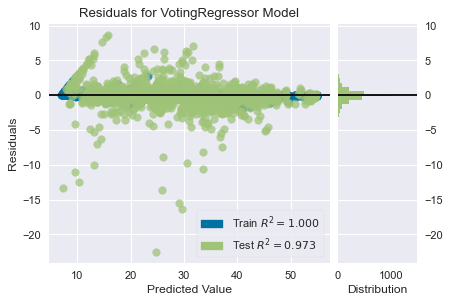

In [54]:
plot_model(blended, plot='residuals', verbose=False, scale=1.1)

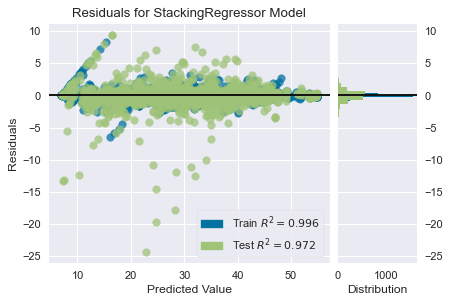

In [55]:
plot_model(stacked, plot='residuals', verbose=False, scale=1.1)

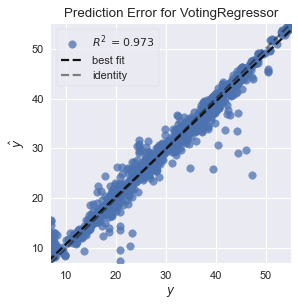

In [56]:
plot_model(blended, plot='error', verbose=False, scale=1.1)

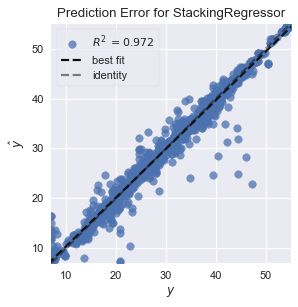

In [57]:
plot_model(stacked, plot='error', verbose=False, scale=1.1)

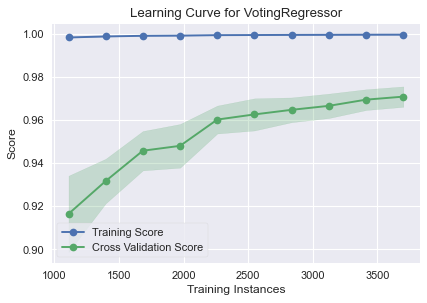

In [58]:
plot_model(blended, plot='learning', verbose=False, scale=1.1)

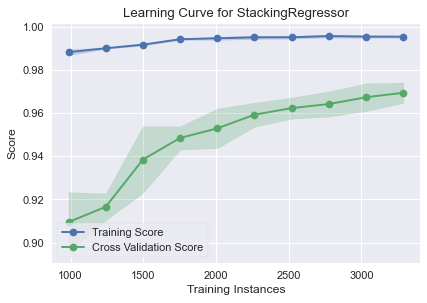

In [59]:
plot_model(stacked, plot='learning', verbose=False, scale=1.1)

# 9. Prediction

To use the model to generate the predicted values. Each ensembled model was evaluated on the test data, and the blended model outperformed the others in terms of prediction performance. The finalize_model() function created based on "Blend model" trains the model on the entire dataset. 

In [60]:
pred_tuned_bagged_1st_top3 = predict_model(bagged_1st_top3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1.3316,4.5498,2.1330,0.9612,0.0995,0.0595


In [61]:
pred_tuned_bagged_2nd_top3 = predict_model(bagged_2nd_top3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,1.2895,4.6906,2.1658,0.9600,0.0990,0.0576


In [62]:
pred_tuned_bagged_3rd_top3 = predict_model(bagged_3rd_top3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,1.0278,3.5231,1.8770,0.9699,0.0884,0.0455


In [63]:
pred_tuned_boosted_1st_top3 = predict_model(boosted_1st_top3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1.4890,5.0115,2.2386,0.9572,0.1044,0.0662


In [64]:
pred_tuned_boosted_2nd_top3 = predict_model(boosted_2nd_top3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,1.0830,3.2998,1.8165,0.9718,0.0853,0.0481


In [65]:
pred_tuned_boosted_3rd_top3 = predict_model(boosted_3rd_top3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,0.9991,3.7758,1.9431,0.9678,0.0918,0.0445


In [66]:
 pred_tuned_blended = predict_model(blended)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.9797,3.1551,1.7763,0.9731,0.0863,0.0445


In [67]:
pred_tuned_stacked = predict_model(stacked)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,0.9025,3.2698,1.8083,0.9721,0.0853,0.0401


In [68]:
final_blended = finalize_model(blended)
final_blended

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'sex', 'test_time',
                                             'Jitter(%)', 'Jitter(Abs)',
                                             'Jitter:RAP', 'Jitter:PPQ5',
                                             'Jitter:DDP', 'Shimmer',
                                             'Shimmer(dB)', 'Shimmer:APQ3',
                                             'Shimmer:APQ5', 'Shimmer:APQ11',
                                             'Shimmer:DDA', 'NHR', 'HNR',
                                             'RPDE', 'DFA', 'PPE'],
                                    transformer=SimpleImputer())),
                ('categorical_impute...
                                                           grow_policy=None,
                                                           importance_type=None,
                                                           interaction_constraints=None,
                                                           learning_rate=None,
                                                           max_bin=None,
                                                           max_cat_threshold=None,
                                                           max_cat_to_onehot=None,
                                                           max_delta_step=None,
                                                           max_depth=15,
                                                           max_leaves=None,
                                                           min_child_weight=None,
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           multi_strategy=None,
                                                           n_estimators=None,
                                                           n_jobs=-1,
                                                           num_parallel_tree=None,
                                                           random_state=123, ...))],
                                 n_jobs=-1))])

# 10. Analyze Final Model Performance on Entire Dataset
The Blend model seems to perform better in both our train and test. Then Blend model was analyzed residuals and prediction error. 

In [69]:
# The predict_model() can be executed with the final blend model over the entire dataset and saved to a csv file. 
pred_final_blended = predict_model(final_blended, data=df)
#pred_final_blended.to_csv('pred_final_blended.csv')
pred_final_blended.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.1129,0.0464,0.2153,0.9996,0.0134,0.0055


,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),...,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,total_UPDRS,prediction_label
0,72,0,5.643100,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,...,0.01309,0.01662,0.04314,0.014290,21.639999,0.41888,0.54842,0.16006,34.397999,34.540602
1,72,0,12.666000,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,...,0.01072,0.01689,0.02982,0.011112,27.183001,0.43493,0.56477,0.10810,34.894001,35.114923
2,72,0,19.681000,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,...,0.00844,0.01458,0.02202,0.020220,23.047001,0.46222,0.54405,0.21014,35.389000,35.445672
3,72,0,25.646999,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,...,0.01265,0.01963,0.03317,0.027837,24.445000,0.48730,0.57794,0.33277,35.810001,35.850046
4,72,0,33.641998,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,...,0.00929,0.01819,0.02036,0.011625,26.125999,0.47188,0.56122,0.19361,36.375000,36.413550


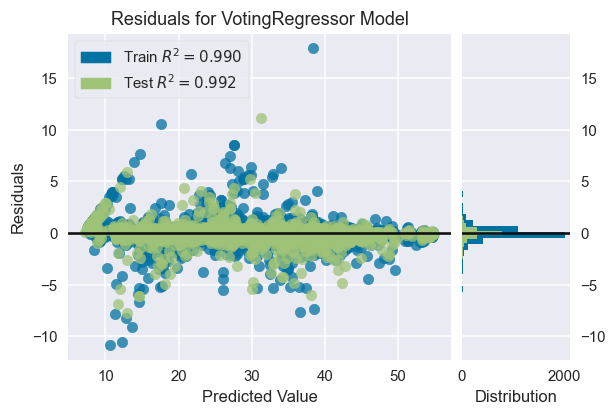

In [70]:
# generate Residuals plot for the finalized blend model. 
plot_model(final_blended, plot='residuals', verbose=False, scale=1.5)

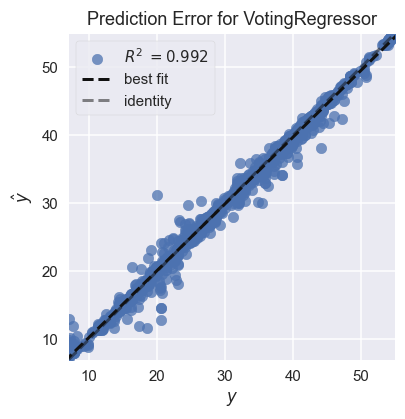

In [71]:
# generate Error plot for the finalized blend model. 
plot_model(final_blended, plot='error', verbose=False, scale=1.5)

# 11. Save Final Model
. The final blended model was saved.

In [72]:
# save model
save_model(final_blended, 'UPDRS_prediction_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'sex', 'test_time',
                                              'Jitter(%)', 'Jitter(Abs)',
                                              'Jitter:RAP', 'Jitter:PPQ5',
                                              'Jitter:DDP', 'Shimmer',
                                              'Shimmer(dB)', 'Shimmer:APQ3',
                                              'Shimmer:APQ5', 'Shimmer:APQ11',
                                              'Shimmer:DDA', 'NHR', 'HNR',
                                              'RPDE', 'DFA', 'PPE'],
                                     transformer=SimpleImputer())),
                 ('categorical_impute...
                                                            grow_policy=None,
                                                            importance_type=None,
                                                           

# 12. Conclusion

From the results presented here, some conclusions can be drawn:

- The top 3 models have been chosen from all compared models based on the least Root-mean-square-error (RMSE).
- Each of the models has been tuned with hyperparameters and improved based on the reduction of RMSE value.
- Some ensembled models have been created from top three tuned models. - i. Extra Trees Regressor, ii. Random Forest Regressor, and iii. Extreme Gradient Boosting.
- The Blended model has been chosen as the final model based on the performance in predicting Total UPDRS Score.

# 13. Deploying and Running The Model in Google Cloud

Google Cloud Project Name: afsana-ee8603-ml-project
- Predicts passed data based on saved final blended model (Code: main.py available in Github repo)

For Running the deployed model in Cloud, execute test.py available in the github repository. Make sure to point to correct location of the test_data.

# 13. a. Storing test data into a CSV for cloud testing

In [73]:
get_config('X_test').to_csv('test_data.csv', encoding='utf-8', index=False)

# 13. b. Execution
The deployed model predicts target values from test data that is received.

In [74]:
import requests

In [75]:
# if running in cloud
server_response = requests.post("https://getprediction-rkac76by4a-ue.a.run.app", files={'file': open('test_data.csv', 'rb')})
# if running local
#server_response = requests.post("http://127.0.0.1:5000", files={'file': open('test_data.csv', 'rb')})

In [76]:
print(server_response.json())

{'DFA': {'0': 0.6715800166, '1': 0.6023600101, '10': 0.5706800222, '100': 0.6520799994, '1000': 0.7007700205, '1001': 0.6341300011, '1002': 0.7397400141, '1003': 0.5693100095, '1004': 0.6228200197, '1005': 0.6016499996, '1006': 0.7331500053, '1007': 0.7458800077, '1008': 0.6462900043, '1009': 0.6030899882, '101': 0.5742499828, '1010': 0.62579, '1011': 0.6183999777, '1012': 0.7283700109, '1013': 0.6342200041, '1014': 0.5770699978, '1015': 0.5684900284, '1016': 0.7177500129, '1017': 0.7248899937, '1018': 0.7526299953, '1019': 0.5392500162, '102': 0.6520100236, '1020': 0.6734399796, '1021': 0.6276599765, '1022': 0.7958499789, '1023': 0.6483899951, '1024': 0.5517500043, '1025': 0.7871800065, '1026': 0.6413400173, '1027': 0.6036999822, '1028': 0.6916199923, '1029': 0.6548500061, '103': 0.591440022, '1030': 0.6011199951, '1031': 0.5774199963, '1032': 0.7050600052, '1033': 0.601970017, '1034': 0.5438899994, '1035': 0.6246299744, '1036': 0.5352600217, '1037': 0.6618000269, '1038': 0.6051899791

# References
- Little, M. A., McSharry, P. E., Hunter, E. J., Spielman, J., & Ramig, L. O. (2009). Suitability of dysphonia measurements for telemonitoring of Parkinson’s disease. IEEE Transactions on Bio-Medical Engineering, 56(4), 1015. https://doi.org/10.1109/TBME.2008.2005954
- Loeber, P. (2023). Patrickloeber/ml-deployment [Python]. https://github.com/patrickloeber/ml-deployment (Original work published 2021)
- Yard1. (n.d.). pycaret/tutorials/Tutorial—Regression.ipynb at master · pycaret/pycaret. GitHub. Retrieved November 29, 2023, from https://github.com/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Regression.ipynb

